In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lhc1-dataset/dataset.csv
/kaggle/input/lhc-on-machine-learning-mu-ict/Book1.csv


In [3]:
df = pd.read_csv('/kaggle/input/lhc1-dataset/dataset.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
df.head()

,Unnamed: 0,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,...,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Province/State,Country/Region,Last Update,Latitude,Longitude,Incidence_Rate,Case-Fatality_Ratio
0,0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513.0,2201.0,...,Afghanistan,134.896578,4.191343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316.0,1181.0,...,Albania,2026.409062,2.025173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897.0,2762.0,...,Algeria,227.809861,2.764848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117.0,84.0,...,Andorra,10505.403482,1.034865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568.0,405.0,...,Angola,53.452981,2.305328,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df1 = df[['Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Combined_Key','Incident_Rate','Case_Fatality_Ratio']]

In [33]:
df1

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513.0,2201.0,41727.0,8585.0,Afghanistan,134.896578,4.191343
1,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316.0,1181.0,33634.0,23501.0,Albania,2026.409062,2.025173
2,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897.0,2762.0,67395.0,29740.0,Algeria,227.809861,2.764848
3,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117.0,84.0,7463.0,570.0,Andorra,10505.403482,1.034865
4,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568.0,405.0,11146.0,6017.0,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...
3873820,Unknown,Ukraine,2022-01-01 04:22:14,NaN,NaN,0.0,0.0,0.0,0.0,"Unknown, Ukraine",0.000000,0.000000
3873821,NaN,Nauru,2022-01-01 04:22:14,-0.52280,166.931500,0.0,0.0,0.0,0.0,Nauru,0.000000,0.000000
3873822,Niue,New Zealand,2022-01-01 04:22:14,-19.05440,-169.867200,0.0,0.0,0.0,0.0,"Niue, New Zealand",0.000000,0.000000
3873823,NaN,Tuvalu,2022-01-01 04:22:14,-7.10950,177.649300,0.0,0.0,0.0,0.0,Tuvalu,0.000000,0.000000


In [34]:
df_india = df1[df1['Country_Region'] == 'India']
df_india.head(50)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
247,Andaman and Nicobar Islands,India,2021-01-02 05:22:33,11.225999,92.968178,4946.0,62.0,4826.0,58.0,"Andaman and Nicobar Islands, India",1185.988740,1.253538
248,Andhra Pradesh,India,2021-01-02 05:22:33,15.912900,79.740000,882612.0,7108.0,871916.0,3588.0,"Andhra Pradesh, India",1637.395998,0.805337
249,Arunachal Pradesh,India,2021-01-02 05:22:33,27.768456,96.384277,16719.0,56.0,16564.0,99.0,"Arunachal Pradesh, India",1064.593896,0.334948
250,Assam,India,2021-01-02 05:22:33,26.357149,92.830441,216251.0,1049.0,211910.0,3292.0,"Assam, India",607.326546,0.485084
251,Bihar,India,2021-01-02 05:22:33,25.679658,85.604840,252219.0,1400.0,245476.0,5343.0,"Bihar, India",202.098678,0.555073
252,Chandigarh,India,2021-01-02 05:22:33,30.733839,76.768278,19799.0,318.0,19045.0,436.0,"Chandigarh, India",1709.060116,1.606142
253,Chhattisgarh,India,2021-01-02 05:22:33,21.264705,82.035366,280507.0,3375.0,264769.0,12363.0,"Chhattisgarh, India",952.931100,1.203179
254,Dadra and Nagar Haveli and Daman and Diu,India,2021-01-02 05:22:33,20.194742,73.080901,3378.0,2.0,3365.0,11.0,"Dadra and Nagar Haveli and Daman and Diu, India",548.622435,0.059207
255,Delhi,India,2021-01-02 05:22:33,28.646519,77.108980,625954.0,10557.0,609322.0,6075.0,"Delhi, India",3345.393669,1.686546
256,Goa,India,2021-01-02 05:22:33,15.359682,74.057396,51135.0,739.0,49388.0,1008.0,"Goa, India",3223.640662,1.445194


## Question 6

In [35]:
df_india1 = df_india[df_india['Country_Region'] == 'India']
df_india1.head(50)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
247,Andaman and Nicobar Islands,India,2021-01-02 05:22:33,11.225999,92.968178,4946.0,62.0,4826.0,58.0,"Andaman and Nicobar Islands, India",1185.988740,1.253538
248,Andhra Pradesh,India,2021-01-02 05:22:33,15.912900,79.740000,882612.0,7108.0,871916.0,3588.0,"Andhra Pradesh, India",1637.395998,0.805337
249,Arunachal Pradesh,India,2021-01-02 05:22:33,27.768456,96.384277,16719.0,56.0,16564.0,99.0,"Arunachal Pradesh, India",1064.593896,0.334948
250,Assam,India,2021-01-02 05:22:33,26.357149,92.830441,216251.0,1049.0,211910.0,3292.0,"Assam, India",607.326546,0.485084
251,Bihar,India,2021-01-02 05:22:33,25.679658,85.604840,252219.0,1400.0,245476.0,5343.0,"Bihar, India",202.098678,0.555073
252,Chandigarh,India,2021-01-02 05:22:33,30.733839,76.768278,19799.0,318.0,19045.0,436.0,"Chandigarh, India",1709.060116,1.606142
253,Chhattisgarh,India,2021-01-02 05:22:33,21.264705,82.035366,280507.0,3375.0,264769.0,12363.0,"Chhattisgarh, India",952.931100,1.203179
254,Dadra and Nagar Haveli and Daman and Diu,India,2021-01-02 05:22:33,20.194742,73.080901,3378.0,2.0,3365.0,11.0,"Dadra and Nagar Haveli and Daman and Diu, India",548.622435,0.059207
255,Delhi,India,2021-01-02 05:22:33,28.646519,77.108980,625954.0,10557.0,609322.0,6075.0,"Delhi, India",3345.393669,1.686546
256,Goa,India,2021-01-02 05:22:33,15.359682,74.057396,51135.0,739.0,49388.0,1008.0,"Goa, India",3223.640662,1.445194


In [36]:
df_india1.drop(df_india1.loc[df_india1['Last_Update'] < '2021-05-04 00:00:00'].index, inplace=True)

In [37]:
df_india1.drop(df_india1.loc[df_india1['Last_Update'] > '2021-05-05 00:00:00'].index, inplace=True)

In [38]:
df_india1

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
1123316,Andaman and Nicobar Islands,India,2021-05-04 04:20:34,11.225999,92.968178,6150.0,70.0,5850.0,230.0,"Andaman and Nicobar Islands, India",1474.692832,1.138211
1123317,Andhra Pradesh,India,2021-05-04 04:20:34,15.912900,79.740000,1163994.0,8207.0,1003935.0,151852.0,"Andhra Pradesh, India",2159.407665,0.705072
1123318,Arunachal Pradesh,India,2021-05-04 04:20:34,27.768456,96.384277,18958.0,59.0,17363.0,1536.0,"Arunachal Pradesh, India",1207.163770,0.311214
1123319,Assam,India,2021-05-04 04:20:34,26.357149,92.830441,263450.0,1389.0,234237.0,27824.0,"Assam, India",739.881797,0.527235
1123320,Bihar,India,2021-05-04 04:20:34,25.679658,85.604840,509047.0,2821.0,398558.0,107668.0,"Bihar, India",407.890466,0.554173
1123321,Chandigarh,India,2021-05-04 04:20:34,30.733839,76.768278,45196.0,507.0,36746.0,7943.0,"Chandigarh, India",3901.342543,1.121781
1123322,Chhattisgarh,India,2021-05-04 04:20:34,21.264705,82.035366,771701.0,9275.0,641449.0,120977.0,"Chhattisgarh, India",2621.602609,1.201890
1123323,Dadra and Nagar Haveli and Daman and Diu,India,2021-05-04 04:20:34,20.194742,73.080901,8008.0,4.0,6334.0,1670.0,"Dadra and Nagar Haveli and Daman and Diu, India",1300.582729,0.049950
1123324,Delhi,India,2021-05-04 04:20:34,28.646519,77.108980,1212989.0,17414.0,1105983.0,89592.0,"Delhi, India",6482.785830,1.435627
1123325,Goa,India,2021-05-04 04:20:34,15.359682,74.057396,98088.0,1320.0,70929.0,25839.0,"Goa, India",6183.640662,1.345730


In [39]:
df_india_confirmed = df_india1['Confirmed'].sum()
print(df_india_confirmed)

20282833.0


In [40]:
df_gujarat = df_india1[df_india1['Province_State'] == 'Gujarat']
df_gujarat.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
1123326,Gujarat,India,2021-05-04 04:20:34,22.694884,71.590923,607422.0,7648.0,452275.0,147499.0,"Gujarat, India",950.992932,1.259092


In [41]:
df_gujarat.drop(df_gujarat.loc[df_gujarat['Last_Update'] > '2021-05-05 00:00:00'].index, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
df_gujarat.drop(df_gujarat.loc[df_gujarat['Last_Update'] < '2021-05-04 00:00:00'].index, inplace=True)

In [43]:
df_gujarat

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
1123326,Gujarat,India,2021-05-04 04:20:34,22.694884,71.590923,607422.0,7648.0,452275.0,147499.0,"Gujarat, India",950.992932,1.259092


In [44]:
df_gujarat_confirmed = df_gujarat['Confirmed'].sum()
print(df_gujarat_confirmed)

607422.0


In [46]:
print("Total Percentage of cases in Gujarat w.r.t India on 4th May, 2021: ",(df_gujarat_confirmed / df_india_confirmed) * 100,"%")

Total Percentage of cases in Gujarat w.r.t India on 4th May, 2021:  2.9947591640674656 %


## Question 7

In [47]:
df_bengal = df_india[df_india['Province_State'] == 'West Bengal']
df_bengal.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
283,West Bengal,India,2021-01-02 05:22:33,23.814082,87.979803,553216.0,9738.0,530366.0,13112.0,"West Bengal, India",555.385876,1.760253
4296,West Bengal,India,2022-01-02 04:20:52,23.814082,87.979803,1642997.0,19773.0,NaN,NaN,"West Bengal, India",1649.441318,1.203471
8310,West Bengal,India,2021-01-03 05:22:52,23.814082,87.979803,554079.0,9766.0,533305.0,11008.0,"West Bengal, India",556.252261,1.762565
12323,West Bengal,India,2022-01-03 02:22:25,23.814082,87.979803,1649150.0,19781.0,NaN,NaN,"West Bengal, India",1655.618452,1.199466
16338,West Bengal,India,2021-01-04 05:22:02,23.814082,87.979803,554975.0,9792.0,534737.0,10446.0,"West Bengal, India",557.151775,1.764404


In [48]:
df_bengal.drop(df_bengal.loc[df_bengal['Last_Update'] > '2022-01-01 01:00:00'].index, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
df_bengal.drop(df_bengal.loc[df_bengal['Last_Update'] < '2021-01-01 01:00:00'].index, inplace=True)

In [50]:
df_bengal.drop(df_bengal.loc[df_bengal['Last_Update'] < '2021-03-01 01:00:00'].index, inplace=True)

In [51]:
df_bengal.drop(df_bengal.loc[df_bengal['Last_Update'] > '2021-05-02 01:00:00'].index, inplace=True)

In [52]:
df_bengal

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
470076,West Bengal,India,2021-03-01 05:23:01,23.814082,87.979803,575118.0,10268.0,561543.0,3307.0,"West Bengal, India",577.373782,1.785373
478422,West Bengal,India,2021-03-02 05:23:30,23.814082,87.979803,575316.0,10268.0,561755.0,3293.0,"West Bengal, India",577.572559,1.784758
486629,West Bengal,India,2021-03-03 05:23:28,23.814082,87.979803,575487.0,10270.0,561964.0,3253.0,"West Bengal, India",577.744229,1.784575
494846,West Bengal,India,2021-03-04 05:24:24,23.814082,87.979803,575712.0,10272.0,562195.0,3245.0,"West Bengal, India",577.970112,1.784225
503072,West Bengal,India,2021-03-05 05:26:29,23.814082,87.979803,575921.0,10273.0,562412.0,3236.0,"West Bengal, India",578.179932,1.783752
...,...,...,...,...,...,...,...,...,...,...,...,...
1044638,West Bengal,India,2021-04-27 04:20:52,23.814082,87.979803,759942.0,11009.0,653984.0,94949.0,"West Bengal, India",762.922716,1.448663
1055858,West Bengal,India,2021-04-28 04:20:32,23.814082,87.979803,776345.0,11082.0,664648.0,100615.0,"West Bengal, India",779.390054,1.427458
1067089,West Bengal,India,2021-04-29 04:20:55,23.814082,87.979803,793552.0,11159.0,676581.0,105812.0,"West Bengal, India",796.664544,1.406209
1078325,West Bengal,India,2021-04-30 04:21:03,23.814082,87.979803,810955.0,11248.0,689466.0,110241.0,"West Bengal, India",814.135804,1.387007


In [53]:
# df_bengal['7DaysMeanAverage'] = df_bengal['Confirmed'].rolling(7).mean()
# df_bengal.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


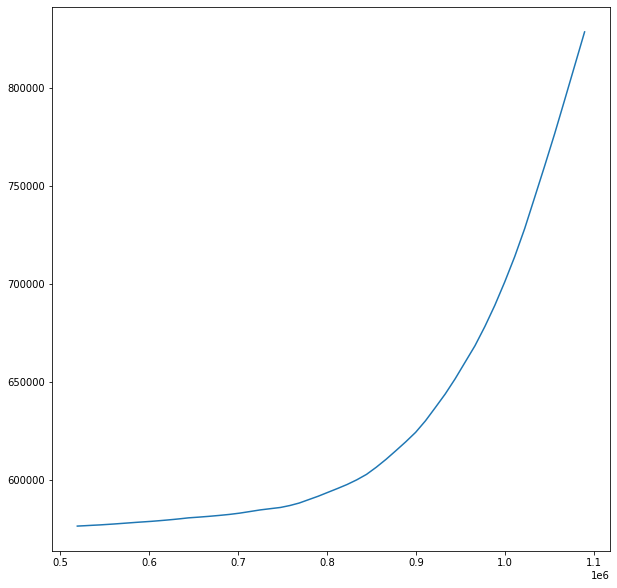

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(df_bengal['Confirmed'])